# Search 🔎

In [1]:
# Settings

INDEX_NAME = 'library'
TYPE_NAME = 'books'

In [2]:
from elasticsearch import Elasticsearch
import requests as r



client = Elasticsearch('http://elsatic:9200')
# client.indices.delete(index=INDEX_NAME)

data = {
    "settings" : {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        TYPE_NAME: {
          "properties": {
            "title": {
              "type": "text",
              "fielddata": True,
            },
            "tag": {
              "type": "keyword"
            },
            "description": {
              "type": "text",
              "fielddata": True,
            },
            "author": {
              "type": "text",
              "fielddata": True,
            },
            "city": {
              "type": "text",
              "fielddata": True,
            },
            "date_of_birth": {
              "type":   "date",
              "format": "yyyy-MM-dd"
            }
          }
        }
      }
}
res = client.indices.create(index=INDEX_NAME, body=data)
print(res)

PUT http://elsatic:9200/library [status:400 request:0.006s]


RequestError: TransportError(400, 'index_already_exists_exception', 'index [library/Wg7vFQINSMWZKCRJ__n3bQ] already exists')

In [3]:
res = r.get(f'http://elsatic:9200/{INDEX_NAME}/{TYPE_NAME}/_mapping?pretty')
print(res.text)

{
  "library" : {
    "mappings" : {
      "books" : {
        "properties" : {
          "author" : {
            "type" : "text",
            "fields" : {
              "keyword" : {
                "type" : "keyword",
                "ignore_above" : 256
              }
            }
          },
          "city" : {
            "type" : "text",
            "fields" : {
              "keyword" : {
                "type" : "keyword",
                "ignore_above" : 256
              }
            }
          },
          "date_of_birth" : {
            "type" : "date"
          },
          "pages" : {
            "type" : "long"
          },
          "tag" : {
            "type" : "text",
            "fields" : {
              "keyword" : {
                "type" : "keyword",
                "ignore_above" : 256
              }
            }
          },
          "text" : {
            "type" : "text",
            "fields" : {
              "keyword" : {
                "type" : 

In [ ]:
# took

import json

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match_all": {},
        }
    }
)

print(json.dumps(res, indent=4, sort_keys=True))

### Generate data

In [ ]:
from faker import Faker


fake = Faker()


def generate_data():
    for idx in range(1000000):


        doc = {
            'title': fake.text(max_nb_chars=20),
            'text': fake.text(max_nb_chars=15000),
            'tag': fake.word().lower(),
            'author': fake.name(),
            'pages': int(fake.numerify()),
            'city': fake.city(),
            'date_of_birth': fake.date_of_birth(),
        }


        res = client.index(index=INDEX_NAME, doc_type=TYPE_NAME, id=idx, body=doc)

    print('Done!')


generate_data()

### Items count

In [4]:
# count
res = r.get('http://elsatic:9200/_cat/count')

print(res.text)

1532958760 13:52:40 29399



### Select all

In [5]:
# query DSL, _source

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match_all": {},
        }
    }
)


print(len(res['hits']['hits']))
# print(json.dumps(res['hits']['hits'], indent=4, sort_keys=True))

10


### Pagination

In [6]:
res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match_all": {},
        },
        "size": 60,
    }
)


print(len(res['hits']['hits']))

60


In [9]:
import json
# from 10000

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match_all": {},
        },
        "size": 2,
        "from": 2
    }
)


print(len(res['hits']['hits']))
print(json.dumps(res['hits']['hits'], indent=4, sort_keys=True))

2
[
    {
        "_id": "92",
        "_index": "library",
        "_score": 1.0,
        "_source": {
            "author": "Judith Lester",
            "city": "Cynthialand",
            "date_of_birth": "1977-03-11",
            "pages": 834,
            "tag": "radio",
            "text": "Loss daughter the into arm answer.\nOffer form step some center tend. Meeting back mean store course return. Phone performance product plant assume national.\nOpen one section tell.\nCause foreign offer chance push strong well. Suffer win front identify interview lose vote trade. Challenge direction think hold probably wind staff.\nStaff line score alone his as environmental. Leader may choose place determine.\nAbout late argue institution rate speak reflect. End clearly resource east society test rather alone.\nSpace clearly six attack. Half include class shoulder recently value list.\nLive phone question listen. Or year return rise. Student behind worker.\nDrug add might industry hotel put gar

### Sort

In [10]:
# avg

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match_all": {},
        },
        "sort": [{"pages": "desc"}]
    }
)


print(len(res['hits']['hits']))
# print(json.dumps(res['hits']['hits'], indent=4, sort_keys=True))

10


### Script Field

In [ ]:
# _source, sort, from 10 000

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match_all": {},
        },
        "size": 2,
        "script_fields" : {
            "some_value" : {
                "script" : {
                    "lang": "painless",
                    "source": "params['_source']['pages'] / 100.0"
                }
            },
         },
    }
)


print(json.dumps(res['hits']['hits'], indent=4, sort_keys=True))

### Highlight

In [14]:
# operator
import json

QUERY = "I love u"

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match": {
                 "text": {
                     "query" : QUERY,
                 }
             },
        },
        "highlight" : {
             "fields" : {
                  "text" : {}
             }
          },
#         "_source": False,
        "size": 100,
    }
)

print(json.dumps(res['hits']['hits'][0]['highlight'], indent=2, sort_keys=True))

{
  "text": [
    ". Quickly note event million quickly as area.\nLawyer war leg suffer range Mr. Agreement data quickly <em>I</em>",
    " later able push leave blood. Side <em>I</em> wait piece scene agreement.\nPractice realize table. Down nice",
    ".\nSurface security officer development. Allow old save reflect <em>I</em> mission.\nAnswer imagine smile next",
    " past scene born whom.\nWind ball Mr three skill. Lay <em>I</em> type plant <em>I</em> down. Color simply computer",
    ". Could onto least public.\nOld base <em>I</em> space situation all measure. Event total through no. Decision"
  ]
}


In [12]:
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict

# only for the retina monitor
%config InlineBackend.figure_format='retina'

def plot_score(res: dict) -> None:
    """
    Plot scor distribution from elaticsearch response.
    """
    print(len(res['hits']['hits']))

    plt.figure(figsize=(7, 7))
    plt.plot([float(hit["_score"]) for hit in res['hits']['hits']])


    plt.xlabel('doc')
    plt.ylabel('_score')
    plt.title('Scoring')
    plt.grid(True)
    plt.show()

def plot_token_frequency(res: dict, query: str, fields: list) -> None:
    """
    Plot frequency of tokens by document.
    """
    headers = {
        'Content-Type': 'application/json'
    }
    data = {
      "tokenizer": "standard",
      "text": query
    }

    res_token = r.post(f'http://elsatic:9200/_analyze', json=data, headers=headers)
    tokens = [token['token'] for token in res_token.json()['tokens']]


    y_dict = defaultdict(list)
    
    
    for hit in res['hits']['hits']:
        total = 0

        for token in tokens:
            for field in fields:
                if token in hit["_source"][field]:
                    total += hit["_source"][field].count(token)


            y_dict[token].append(total)
            total = 0
    
    plt.figure(figsize=(7.5, 7))

    for token in tokens:
        plt.plot(y_dict[token], label=token)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(True)
    plt.show()
    

100


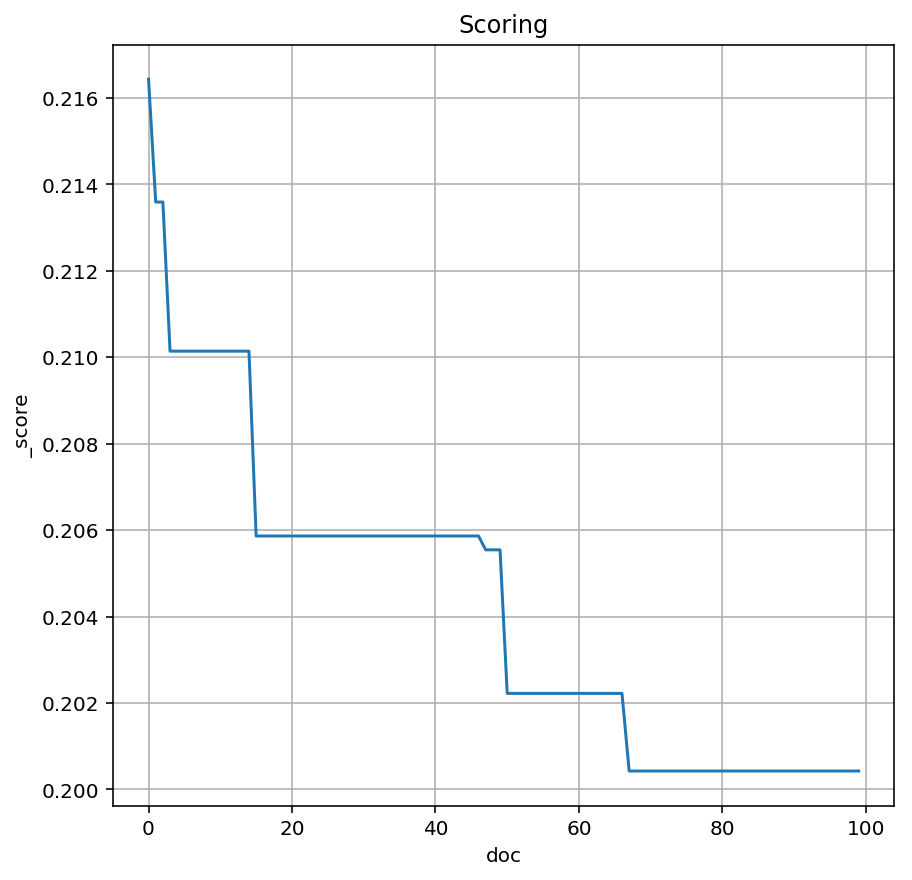

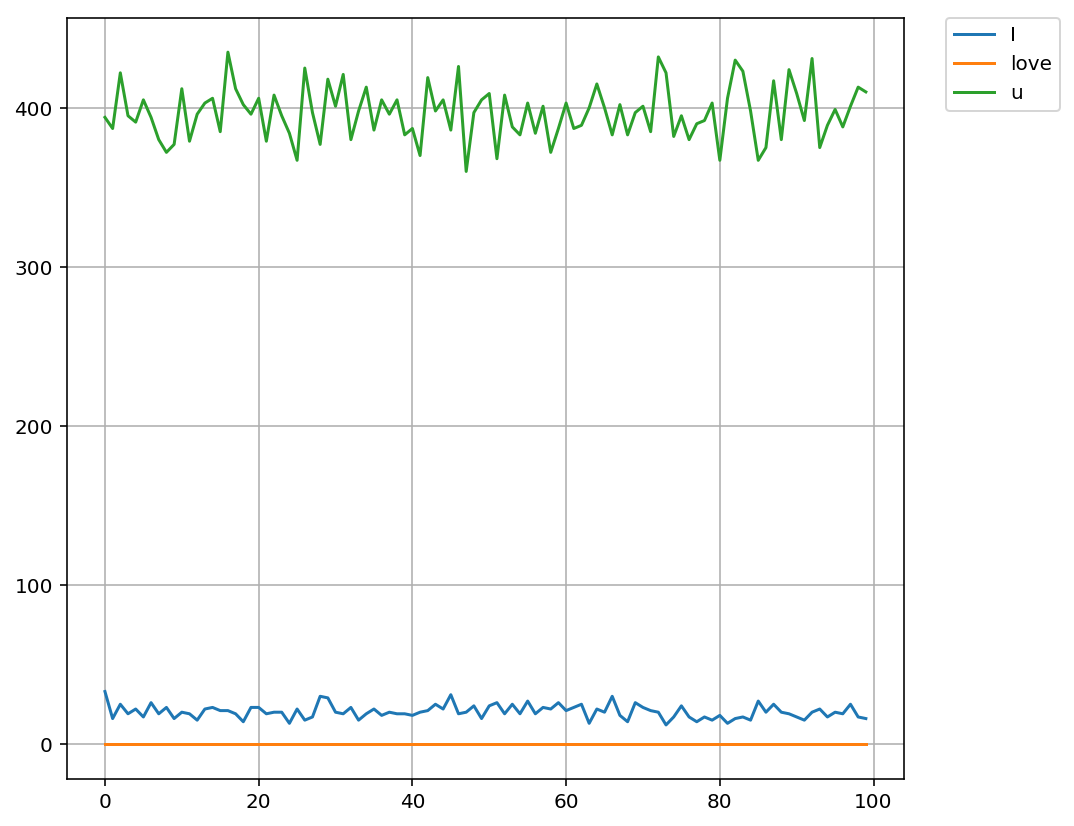

In [15]:
plot_score(res)
plot_token_frequency(res, QUERY, ['text'])

### Query DSL

65


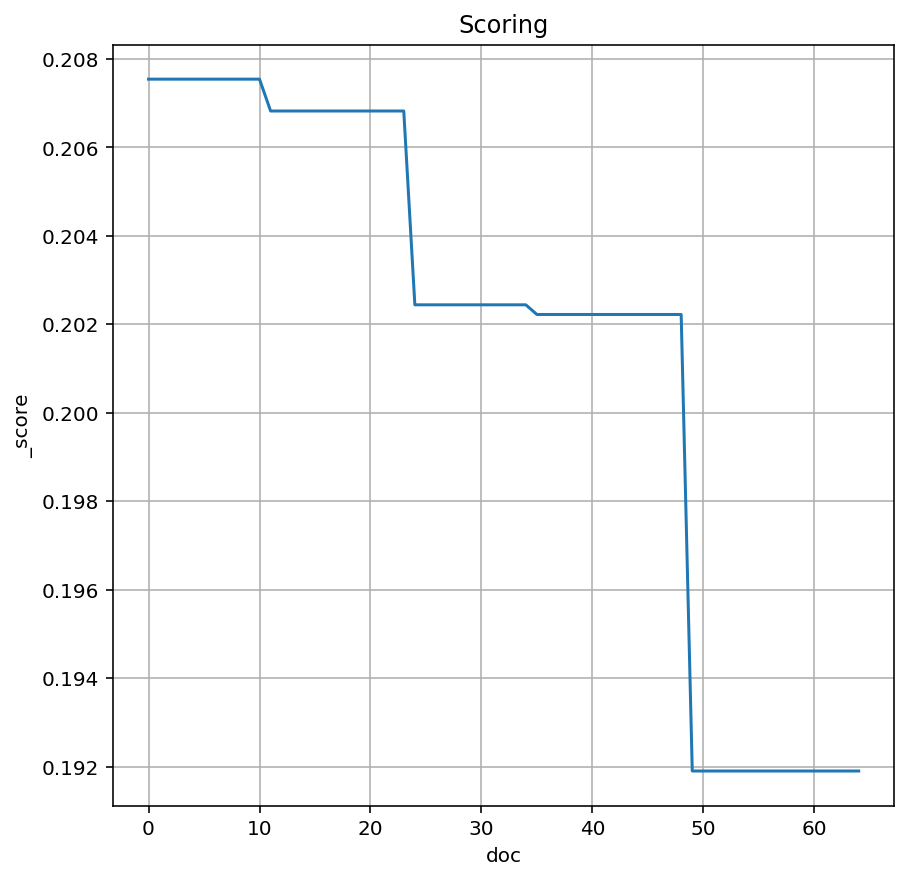

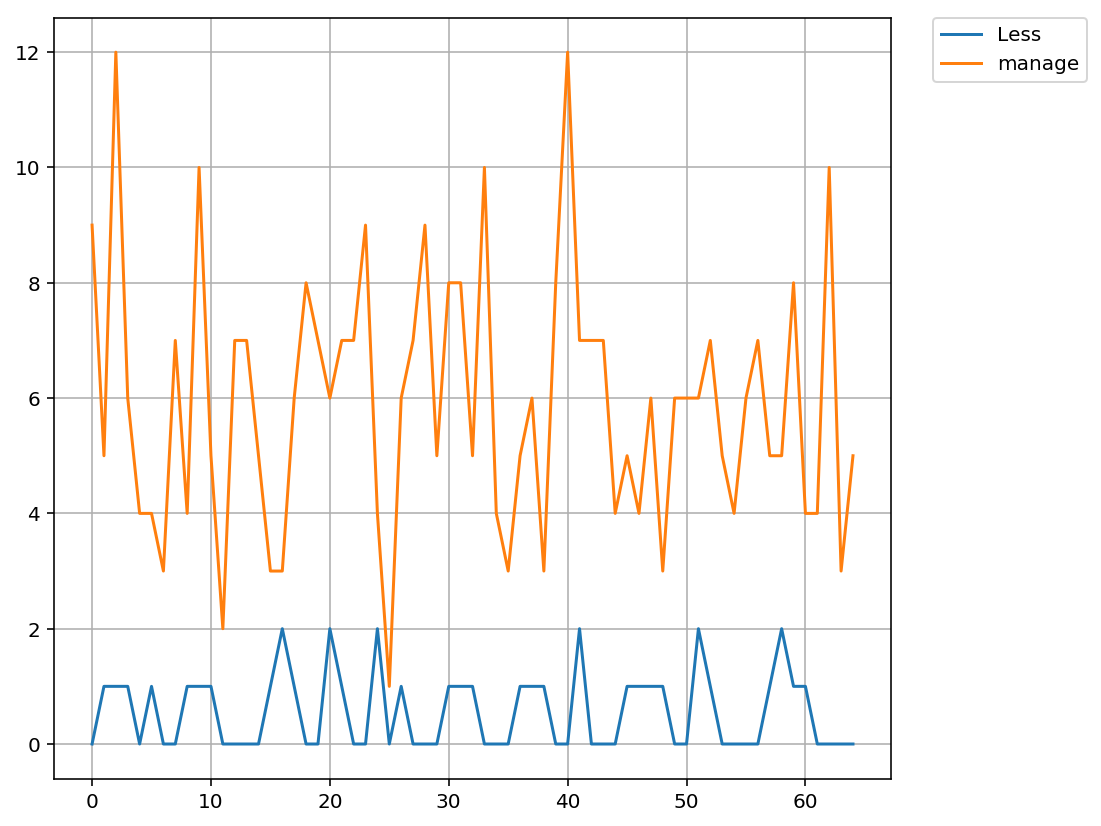

In [17]:
# match, match_phrase, prefix

QUERY = "Less manage"

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
        "query": {
             "match_phrase": {
                 "text": {
                     "query": QUERY,
                 },
             },
        },
        "size": 100
    }
)

plot_score(res)
plot_token_frequency(res, QUERY, ['text'])

100


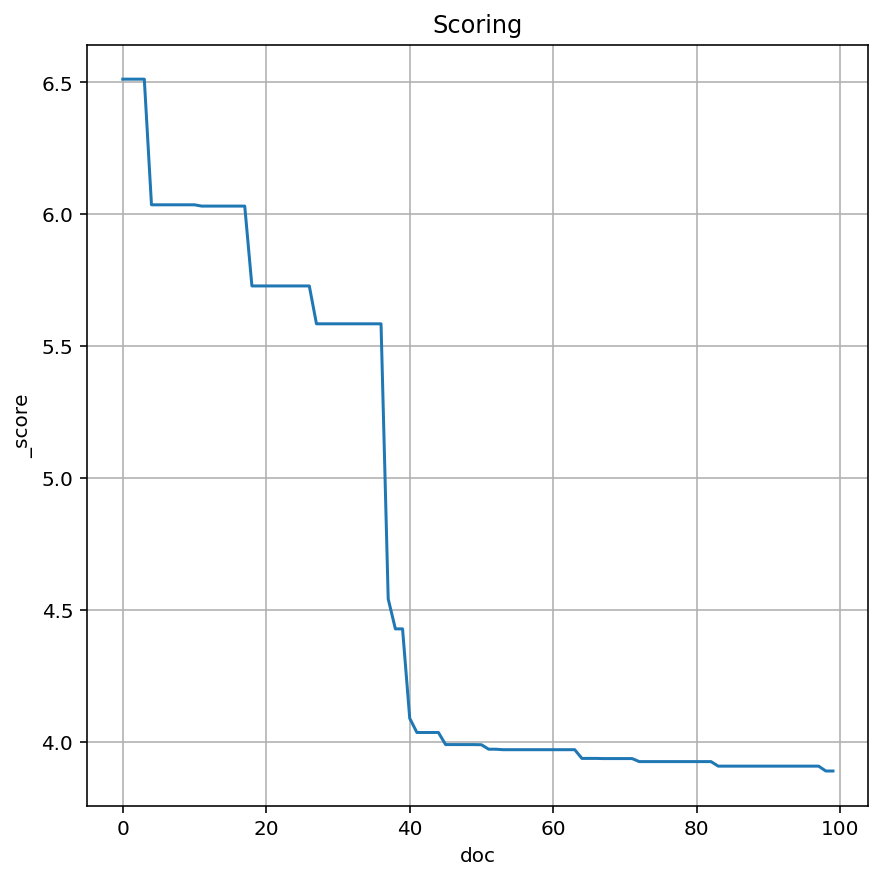

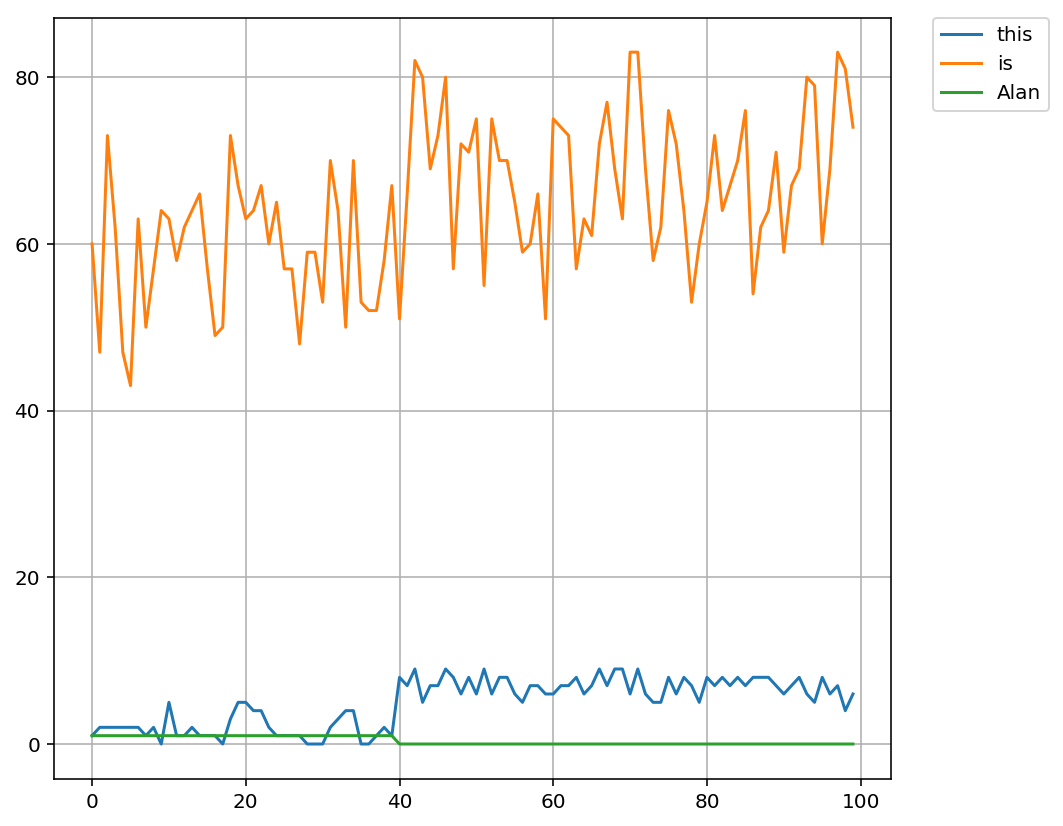

In [21]:
# Multi match
# ^, phrase, most_fields

QUERY = "this is Alan"

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
      "query": {
        "multi_match" : {
          "query": QUERY, 
          "fields": [ "text^20", "author" ] 
        }
      },
      "size": 100
    }
)

plot_score(res)
plot_token_frequency(res, QUERY, ['text', 'author',])

In [ ]:
# most_fields, cross_fields, phrase, phrase_prefix

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
      "query": {
        "multi_match" : {
          "query": "you need", 
          "type": "phrase",  
          "fields": [ "text", "title", ],
        }
      },
      "size": 100
    }
)

plot_score(res)

# Bool query




```
query = {
  "query": {
    "bool" : {
      "must" : {
        "term" : ...
      },
      "filter": {
        "term" : ...
      },
      "must_not" : {
        "range" : {
          "pages" : { "gte" : 10, "lte" : 20 }
        }
      },
      "should" : [
        { "term" : ... },
        { "term" : ... }
      ]
    }
  }
}
```


**Bool:**
 - must
 - must_not
 - should
 - filter

In [ ]:
# Bool query

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body={
      "query": {
        "bool": {
            "should": [
              {
                "term" : {
                  "date": {
                    "value": '2017-06-12',
                    "boost": 1.1 
                  }
                }
              },
                {
                   "terms" : {
                     "date": ['2017-06-13', '2017-06-14']
                   }
                }
             ]
            },
        },
        
      "size": 100
    }
)


100


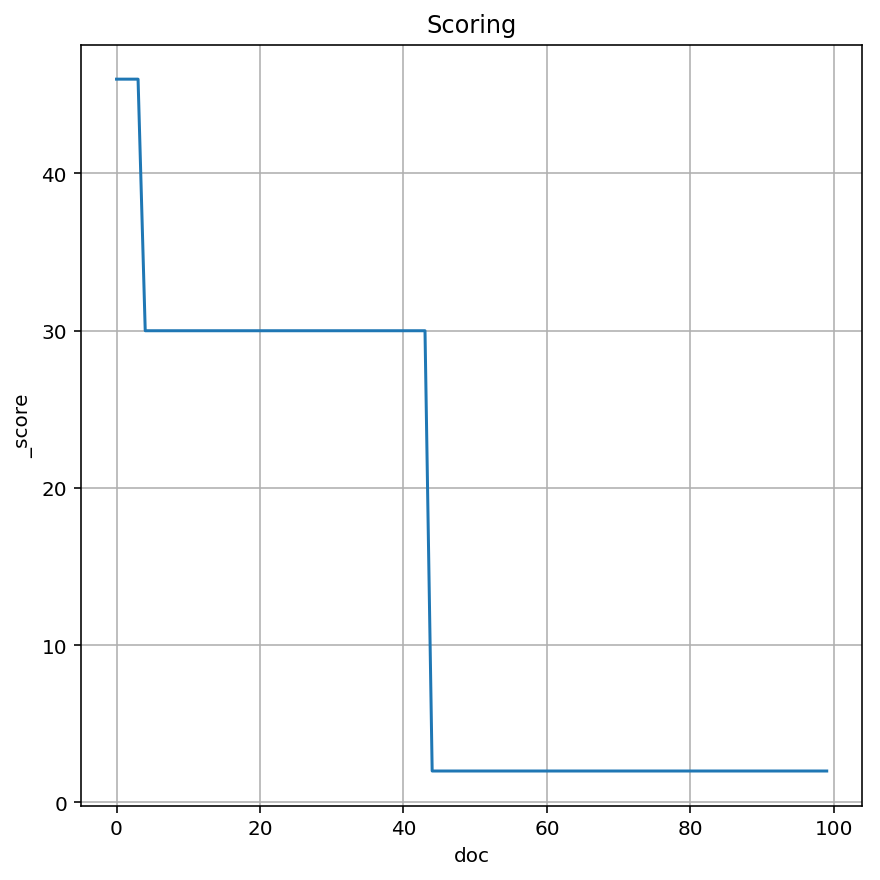

In [22]:
# Function Score Query

query = {
    "query": {
        "function_score": {
          "query": { "match_all": {} },
          "boost": "2", 
          "functions": [
              {
                  "filter": { "match": { "author": "Bob" } },
                  "weight": 23
              },
              {
                  "filter": { "match": { "author": "Alan" } },
                  "weight": 15
              },
          ],
        }
    },
    "size": 100
}

res = client.search(
    index=INDEX_NAME,
    doc_type=TYPE_NAME,
    body=query
)


plot_score(res)

In [ ]:
import requests as r
    
res = r.get('http://elsatic:9200/bank/_mapping?pretty')

print(res.text)
# client.search(index=INDEX_NAME, body={})

